# Welcome to Debt Dataset. 

## In creating my dataset, I decided to:
    - use the sector, quarterly, and covid data to predict and measure trends on how covid impacted debt across the US, Sweden, and Germany. How I joined them?
    - Create a new column to measure the debt change over time for each company


In [7]:
from google.cloud import bigquery
bqclient = bigquery.Client()

In [8]:
project_path = "tech-22-01-b6224b53.tech_talent_2022"
covid = "covid_data"

query = f"""
SELECT *
FROM {project_path}.{covid}
"""
fd = (bqclient.query(query)
    .result()
    .to_dataframe())
#df = df.merge(fd,)
fd = fd.drop(columns=["iso_code","continent"])
#fd.columns
fd.rename(columns={"location":"Country",},inplace=True)
fd

,Country,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Germany,2020-03-15,5795.0,1210.0,679.286,11.0,2.0,1.571,69.070,14.422,...,28.2,33.1,None,8.00,81.33,0.947,-17429.1,-7.58,-5.19,-207.735425
1,Germany,2020-03-22,24873.0,2660.0,2725.429,94.0,10.0,11.857,296.458,31.704,...,28.2,33.1,None,8.00,81.33,0.947,-17779.2,-7.11,-1.74,-211.908226
2,Germany,2020-03-29,62095.0,4400.0,5317.429,533.0,100.0,62.714,740.103,52.443,...,28.2,33.1,None,8.00,81.33,0.947,-17504.1,-6.50,1.42,-208.629341
3,Germany,2020-04-05,100123.0,4031.0,5432.571,1584.0,140.0,150.143,1193.354,48.045,...,28.2,33.1,None,8.00,81.33,0.947,-15790.4,-5.48,9.04,-188.203949
4,Germany,2020-04-12,127854.0,2946.0,3961.571,3022.0,286.0,205.429,1523.877,35.113,...,28.2,33.1,None,8.00,81.33,0.947,-13650.7,-4.45,11.65,-162.701113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,Sweden,2022-01-23,1784005.0,0.0,31948.857,15674.0,0.0,23.000,175588.295,0.000,...,18.8,18.9,None,2.22,82.80,0.945,NaN,NaN,NaN,NaN
2192,Sweden,2022-01-24,1784005.0,0.0,31948.857,15674.0,0.0,23.000,175588.295,0.000,...,18.8,18.9,None,2.22,82.80,0.945,NaN,NaN,NaN,NaN
2193,Sweden,2022-01-25,1922990.0,138985.0,37911.286,15693.0,19.0,19.286,189267.707,13679.412,...,18.8,18.9,None,2.22,82.80,0.945,NaN,NaN,NaN,NaN
2194,Sweden,2022-01-26,1973485.0,50495.0,39021.286,15768.0,75.0,20.429,194237.610,4969.903,...,18.8,18.9,None,2.22,82.80,0.945,NaN,NaN,NaN,NaN


In [9]:
import pandas as pd
def query_data(dataset_name:str,project_path ="tech-22-01-b6224b53.tech_talent_2022")->pd.DataFrame:
    query = f"""
    SELECT *
    FROM {project_path}.{dataset_name}
    """
    df = (bqclient.query(query)
    .result()
    .to_dataframe())
    return df


sector = query_data("sector_data")
quarterly = query_data("quarterly_financials_factset")
merge = quarterly.merge(sector,on = "ISIN")
df = merge.drop(columns=["GICS","GICS_1","GICS_2","GICS_3","Website"])
df

,date_marker,ISIN,Cash_and_cash_equivalents,Inventory,Long_term_debt,Net_debt,Net_income,Number_of_employees,Sales,Short_term_debt,...,Trade_payables,Trade_receivables,Name,Country,Ticker,Sector,Industry_Group,Industry,Sub_Industry,Market
0,2018-09-30,CH0012221716,3244.080863,5232.027443,5698.665402,4936.719658,349.917055,NaN,6094.746944,2482.135119,...,5015.066621,9715.884433,ABB,Switzerland,ABB SS Equity,Industrials,Capital Goods,Electrical Equipment,Electrical Components & Equipm,omx
1,2018-12-31,CH0012221716,3636.443000,3747.539527,5762.148194,3902.374843,178.779794,NaN,6482.520272,1776.669650,...,3870.008139,6168.918941,ABB,Switzerland,ABB SS Equity,Industrials,Capital Goods,Electrical Equipment,Electrical Components & Equipm,omx
2,2019-03-31,CH0012221716,3176.737781,3971.144874,6986.685700,5404.996242,349.636663,NaN,6029.250861,1595.048322,...,3634.501510,6762.256791,ABB,Switzerland,ABB SS Equity,Industrials,Capital Goods,Electrical Equipment,Electrical Components & Equipm,omx
3,2019-06-30,CH0012221716,2834.562733,3912.890811,7622.936519,7163.681157,-64.076710,NaN,6384.532226,2375.307371,...,3606.427864,6740.428605,ABB,Switzerland,ABB SS Equity,Industrials,Capital Goods,Electrical Equipment,Electrical Components & Equipm,omx
4,2019-09-30,CH0012221716,2887.543582,4002.935258,7821.500676,6950.100929,384.048707,NaN,6239.217527,2016.143835,...,3690.148612,6912.493150,ABB,Switzerland,ABB SS Equity,Industrials,Capital Goods,Electrical Equipment,Electrical Components & Equipm,omx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,2020-09-30,US0258161092,28166.972451,0.000000,38184.454298,11480.834094,912.047043,NaN,7872.180905,1463.352247,...,NaN,NaN,American Express,United States,AXP US Equity,Financials,Diversified Financials,Consumer Finance,Consumer Finance,dow
1205,2020-12-31,US0258161092,26942.094797,0.000000,25436.639356,9697.192622,1197.795183,63700.0,8170.674287,11202.648063,...,NaN,NaN,American Express,United States,AXP US Equity,Financials,Diversified Financials,Consumer Finance,Consumer Finance,dow
1206,2021-03-31,US0258161092,34272.100589,0.000000,35751.722807,2822.258134,1843.110727,NaN,7825.748520,1342.635917,...,NaN,NaN,American Express,United States,AXP US Equity,Financials,Diversified Financials,Consumer Finance,Consumer Finance,dow
1207,2021-06-30,US0258161092,25968.461956,0.000000,31506.028188,7109.368189,1877.861061,NaN,8763.075137,1571.801958,...,NaN,NaN,American Express,United States,AXP US Equity,Financials,Diversified Financials,Consumer Finance,Consumer Finance,dow


In [10]:
import math
import collections

#This can only happen between the same company only
#make sure that the each company are arranged in date order
def get_target(net_debt_list):
    nan = float("NaN")
    debt_change_list = ["Base"]
    debt_change_nums = [0]
    for i in range(1,len(net_debt_list)):
        if not math.isnan(net_debt_list[i-1]) or math.isnan(net_debt_list[i]):
            if (net_debt_list[i-1]-net_debt_list[i])>net_debt_list[i]:
                debt_change_list.append("Increase")
                debt_change_nums.append(1)
            else:
                debt_change_list.append("Decrease")
                debt_change_nums.append(-1)
        else:
            debt_change_list.append("NaN")
            debt_change_nums.append(float("-inf"))
    return debt_change_list, debt_change_nums
            

dff = pd.DataFrame()
for i in collections.Counter(df["Name"]).keys():
    fdd  = df[df["Name"]==i]
    value = get_target(fdd["Net_debt"].to_list())
    fdd["Debt_change"],fdd["Debt_change_num"] = value[0],value[1]
    dff= dff.append(fdd) 
dff.rename(columns={"date_marker":"date",},inplace=True)
#dfff = dff.merge(fd,on="date") #This gives a larger dataset but just does it by date which means
#those of other countries will be assigned to the same date
dfff = dff.merge(fd,on=["date","Country"],sort=True)
dfff

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,ISIN,Cash_and_cash_equivalents,Inventory,Long_term_debt,Net_debt,Net_income,Number_of_employees,Sales,Short_term_debt,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,2020-03-31,DE0005190003,13990.00000,18594.0,72501.000000,105224.000000,554.000000,NaN,23252.000000,46713.000000,...,28.2,33.1,None,8.00,81.33,0.947,NaN,NaN,NaN,NaN
1,2020-03-31,DE0005439004,2752.50000,5167.8,3233.000000,4092.500000,404.200000,239649.0,8405.500000,3612.000000,...,28.2,33.1,None,8.00,81.33,0.947,NaN,NaN,NaN,NaN
2,2020-03-31,DE0005552004,3003.00000,312.0,14433.000000,14357.000000,301.000000,NaN,15464.000000,2927.000000,...,28.2,33.1,None,8.00,81.33,0.947,NaN,NaN,NaN,NaN
3,2020-03-31,DE0005557508,4078.00000,1893.0,71499.000000,79805.000000,916.000000,NaN,19943.000000,12384.000000,...,28.2,33.1,None,8.00,81.33,0.947,NaN,NaN,NaN,NaN
4,2020-03-31,DE0005785604,2028.00000,3739.0,21160.000000,26529.000000,459.000000,NaN,9135.000000,7397.000000,...,28.2,33.1,None,8.00,81.33,0.947,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2021-09-30,US38141G1040,NaN,NaN,219661.767096,442107.951176,4562.561512,NaN,12452.450329,231273.139686,...,19.1,24.6,None,2.77,78.86,0.926,NaN,NaN,NaN,NaN
608,2021-09-30,US46625H1005,NaN,NaN,276098.197726,499969.810023,9867.451272,NaN,26609.286317,263439.325224,...,19.1,24.6,None,2.77,78.86,0.926,NaN,NaN,NaN,NaN
609,2021-09-30,US89417E1091,NaN,NaN,6203.891575,5584.365267,557.382468,NaN,7469.943122,86.285001,...,19.1,24.6,None,2.77,78.86,0.926,NaN,NaN,NaN,NaN
610,2021-09-30,US91324P1021,NaN,NaN,37400.233701,22330.558269,3466.460829,NaN,61368.912619,3123.517038,...,19.1,24.6,None,2.77,78.86,0.926,NaN,NaN,NaN,NaN


In [11]:

df = dfff.drop(columns=['Ticker',"Market",'diabetes_prevalence', 'female_smokers','total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million','icu_patients_per_million',
       'icu_patients', 'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million',
       'weekly_icu_admissions_per_million', 
       'weekly_hosp_admissions_per_million', 
       'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed_per_thousand',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed_per_hundred',
       'cardiovasc_death_rate', 'male_smokers', 'handwashing_facilities',
       'hospital_beds_per_thousand','excess_mortality_cumulative_per_million','excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality','Cash_and_cash_equivalents','Long_term_debt','Number_of_employees',
       'Sales', 'Short_term_debt', 'Total_interest_bearing_debt','Trade_payables', 'Trade_receivables','Trade_payables', 'Trade_receivables','median_age', 'aged_65_older', 'aged_70_older','Inventory','population',"weekly_icu_admissions",'new_cases_smoothed','new_vaccinations_smoothed', 'population_density','new_people_vaccinated_smoothed','extreme_poverty','gdp_per_capita','new_deaths_smoothed','new_tests_smoothed', 'life_expectancy', 'human_development_index'])
df.columns

Index(['date', 'ISIN', 'Net_debt', 'Net_income', 'Name', 'Country', 'Sector',
       'Industry_Group', 'Industry', 'Sub_Industry', 'Debt_change',
       'Debt_change_num', 'total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'reproduction_rate', 'weekly_hosp_admissions',
       'new_tests', 'total_tests', 'positive_rate', 'tests_per_case',
       'tests_units', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'stringency_index'],
      dtype='object')

In [12]:
df.describe()

,Net_debt,Net_income,Debt_change_num,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,weekly_hosp_admissions,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,stringency_index
count,607.000000,612.000000,612.0,6.120000e+02,612.000000,612.000000,612.000000,612.000000,363.000000,3.990000e+02,3.990000e+02,399.000000,399.000000,2.400000e+02,2.400000e+02,2.400000e+02,1.500000e+02,2.400000e+02,612.000000
mean,28499.255715,1261.540702,-inf,7.577831e+06,34322.643791,143080.738562,551.017974,1.130670,22163.719008,6.345669e+05,1.423291e+08,0.089688,21.174436,1.388949e+08,7.798726e+07,6.283307e+07,1.361648e+06,1.001545e+06,62.434020
std,71772.989686,2733.283874,NaN,1.275279e+07,68918.695183,215827.568586,905.010634,0.284312,30609.735363,7.380757e+05,1.991641e+08,0.061603,18.579830,1.441396e+08,7.743812e+07,6.892530e+07,2.354445e+06,1.247257e+06,12.544834
min,-48850.307121,-9619.000000,-inf,4.834000e+03,0.000000,385.000000,0.000000,0.700000,304.000000,2.540000e+03,4.190000e+04,0.013900,5.200000,2.073840e+05,2.065270e+05,8.560000e+02,1.000000e+00,5.001200e+04,19.440000
25%,852.311923,132.870414,-1.0,1.954180e+05,805.000000,8727.000000,14.000000,0.960000,823.000000,1.858000e+04,1.717022e+06,0.028100,6.800000,1.207467e+07,8.850443e+06,3.200570e+06,4.300000e+01,3.145595e+05,56.020000
50%,6550.000000,443.900000,-1.0,1.152886e+06,8441.000000,14864.000000,72.000000,1.080000,7130.000000,1.422600e+05,1.292602e+07,0.065000,15.400000,9.193743e+07,5.162445e+07,4.249700e+07,7.280000e+02,5.234560e+05,62.500000
75%,27200.179523,1454.034840,-1.0,4.239773e+06,26381.000000,127365.000000,559.000000,1.280000,26017.000000,1.201090e+06,2.577880e+08,0.146000,35.600000,2.124988e+08,1.268251e+08,8.816036e+07,7.930000e+05,1.057419e+06,69.440000
max,542557.983651,24119.468137,1.0,4.352765e+07,312022.000000,699582.000000,3327.000000,1.920000,108010.000000,1.926567e+06,5.848107e+08,0.193000,71.900000,3.994786e+08,2.142317e+08,1.882008e+08,6.014470e+06,4.159717e+06,82.410000


In [13]:
df

,date,ISIN,Net_debt,Net_income,Name,Country,Sector,Industry_Group,Industry,Sub_Industry,...,total_tests,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,stringency_index
0,2020-03-31,DE0005190003,105224.000000,554.000000,BMW,Germany,Consumer Discretionary,Automobiles & Components,Automobiles,Automobile Manufacturers,...,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,76.85
1,2020-03-31,DE0005439004,4092.500000,404.200000,Continental,Germany,Consumer Discretionary,Automobiles & Components,Auto Components,Auto Parts & Equipment,...,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,76.85
2,2020-03-31,DE0005552004,14357.000000,301.000000,Deutsche Post,Germany,Industrials,Transportation,Air Freight & Logistics,Air Freight & Logistics,...,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,76.85
3,2020-03-31,DE0005557508,79805.000000,916.000000,Deutsche Telekom,Germany,Communication Services,Telecommunication Services,Diversified Telecommunication,Integrated Telecommunication S,...,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,76.85
4,2020-03-31,DE0005785604,26529.000000,459.000000,Fresenius,Germany,Health Care,Health Care Equipment & Servic,Health Care Providers & Servic,Health Care Services,...,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,76.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2021-09-30,US38141G1040,442107.951176,4562.561512,Goldman Sachs,United States,Financials,Diversified Financials,Capital Markets,Investment Banking & Brokerage,...,584810697.0,0.065,15.4,tests performed,399478633.0,214231744.0,188200784.0,6014470.0,1144857.0,56.02
608,2021-09-30,US46625H1005,499969.810023,9867.451272,JPMorgan Chase,United States,Financials,Banks,Banks,Diversified Banks,...,584810697.0,0.065,15.4,tests performed,399478633.0,214231744.0,188200784.0,6014470.0,1144857.0,56.02
609,2021-09-30,US89417E1091,5584.365267,557.382468,Travelers,United States,Financials,Insurance,Insurance,Property & Casualty Insurance,...,584810697.0,0.065,15.4,tests performed,399478633.0,214231744.0,188200784.0,6014470.0,1144857.0,56.02
610,2021-09-30,US91324P1021,22330.558269,3466.460829,UnitedHealth,United States,Health Care,Health Care Equipment & Servic,Health Care Providers & Servic,Managed Health Care,...,584810697.0,0.065,15.4,tests performed,399478633.0,214231744.0,188200784.0,6014470.0,1144857.0,56.02


In [14]:
df.to_csv("debt_dataset.csv",index=False)

In [15]:
corr =df[["Net_debt","total_deaths","total_cases","stringency_index","new_cases",'Net_income','new_deaths','new_cases','reproduction_rate', 'weekly_hosp_admissions',
       'new_tests', 'total_tests', 'positive_rate', 'tests_per_case',
       'tests_units', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'new_vaccinations']].corr()
corr

,Net_debt,total_deaths,total_cases,stringency_index,new_cases,Net_income,new_deaths,new_cases,reproduction_rate,weekly_hosp_admissions,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations
Net_debt,1.000000,0.164851,0.153719,0.057111,0.112275,0.265258,0.147604,0.112275,0.024387,0.098228,0.182728,0.162714,-0.005100,-0.054281,0.107685,0.110832,0.102850,0.166534,0.075349
total_deaths,0.164851,1.000000,0.991911,-0.057706,0.505384,0.386757,0.658795,0.505384,-0.259139,0.569042,0.821128,0.992407,-0.323988,0.019951,0.848355,0.865743,0.819295,0.993158,0.494474
total_cases,0.153719,0.991911,1.000000,-0.079624,0.505572,0.371480,0.671766,0.505572,-0.256368,0.577225,0.791388,0.998457,-0.299478,0.027241,0.854844,0.869017,0.828428,0.994631,0.461713
stringency_index,0.057111,-0.057706,-0.079624,1.000000,0.178702,0.044720,0.152461,0.178702,0.229923,0.048971,0.186046,0.011400,0.571620,-0.477268,-0.705934,-0.720147,-0.684594,-0.609689,-0.474454
new_cases,0.112275,0.505384,0.505572,0.178702,1.000000,0.233758,0.909391,1.000000,-0.069043,0.978899,0.779465,0.442198,0.188105,-0.296104,-0.125686,-0.125383,-0.133058,0.959735,-0.000957
Net_income,0.265258,0.386757,0.371480,0.044720,0.233758,1.000000,0.311549,0.233758,-0.016581,0.255552,0.342233,0.349143,-0.074901,-0.044504,0.266453,0.273851,0.254874,0.445472,0.179310
new_deaths,0.147604,0.658795,0.671766,0.152461,0.909391,0.311549,1.000000,0.909391,-0.036938,0.966601,0.873691,0.624271,0.157562,-0.327355,0.199069,0.196686,0.188224,0.970511,0.095749
new_cases,0.112275,0.505384,0.505572,0.178702,1.000000,0.233758,0.909391,1.000000,-0.069043,0.978899,0.779465,0.442198,0.188105,-0.296104,-0.125686,-0.125383,-0.133058,0.959735,-0.000957
reproduction_rate,0.024387,-0.259139,-0.256368,0.229923,-0.069043,-0.016581,-0.036938,-0.069043,1.000000,-0.037662,-0.310324,-0.362990,0.638912,-0.444460,-0.100073,-0.095449,-0.102254,-0.183318,0.035971
weekly_hosp_admissions,0.098228,0.569042,0.577225,0.048971,0.978899,0.255552,0.966601,0.978899,-0.037662,1.000000,0.799767,-0.110320,0.984650,-0.826407,0.044334,0.047591,0.031027,0.966735,0.100482


# Correlation Trends

- The Strigency Index correlates fairly positively but the best with the net income which is the best positively correlated value to the net debt.

- The total death and cases seem to positively correlate very well as expected

- We can see all this better by following the heatmap below

<AxesSubplot:>

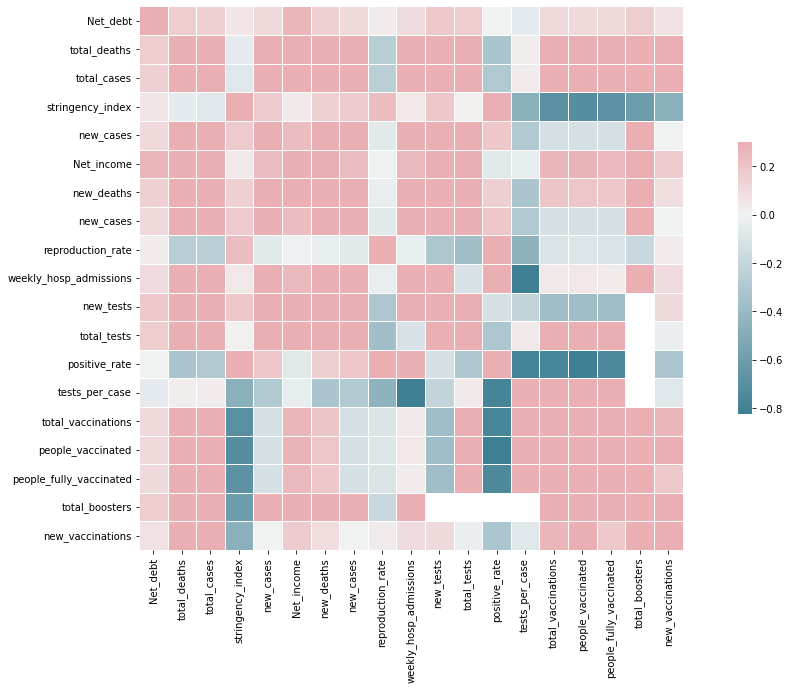

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, vmax=.3, center=0, cmap=cmap, linewidth=.5,square=True,cbar_kws={"shrink":.5})

<AxesSubplot:>

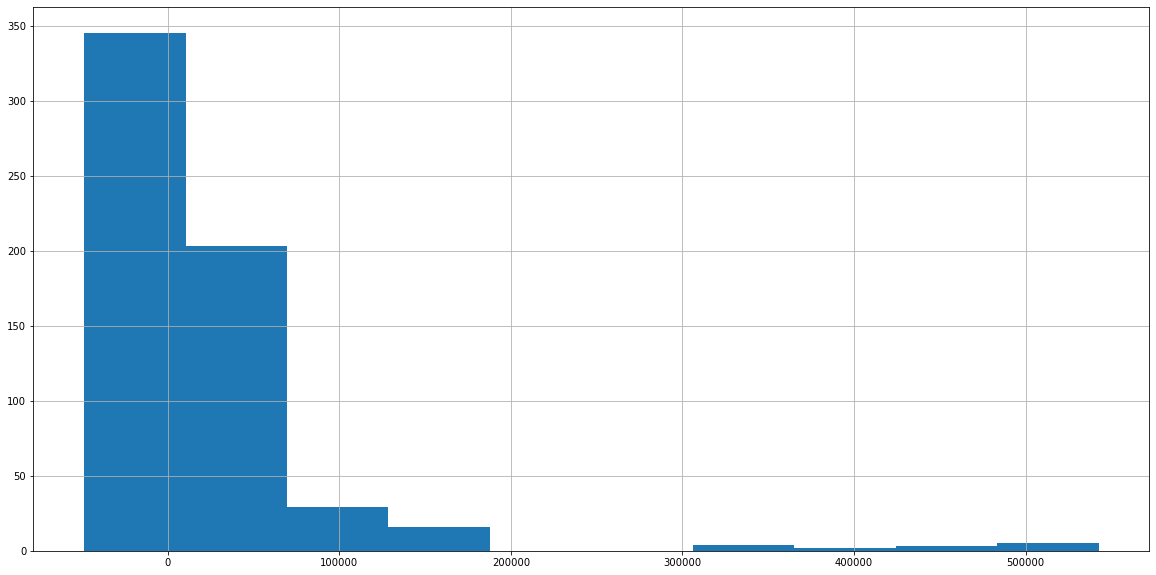

In [17]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
df.Net_debt.hist()

# The Net Debt is skewed to the left in a kind of regressive exponential function

<AxesSubplot:>

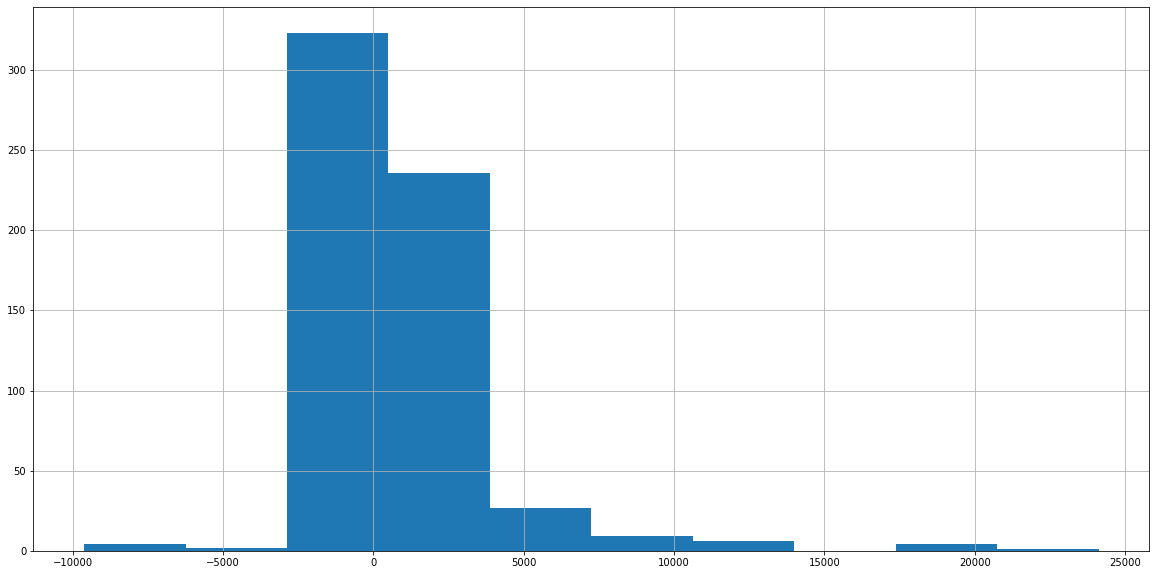

In [18]:
df.Net_income.hist()

# The Net income is just a normal distribution but is more oriented to the right than the left

<AxesSubplot:>

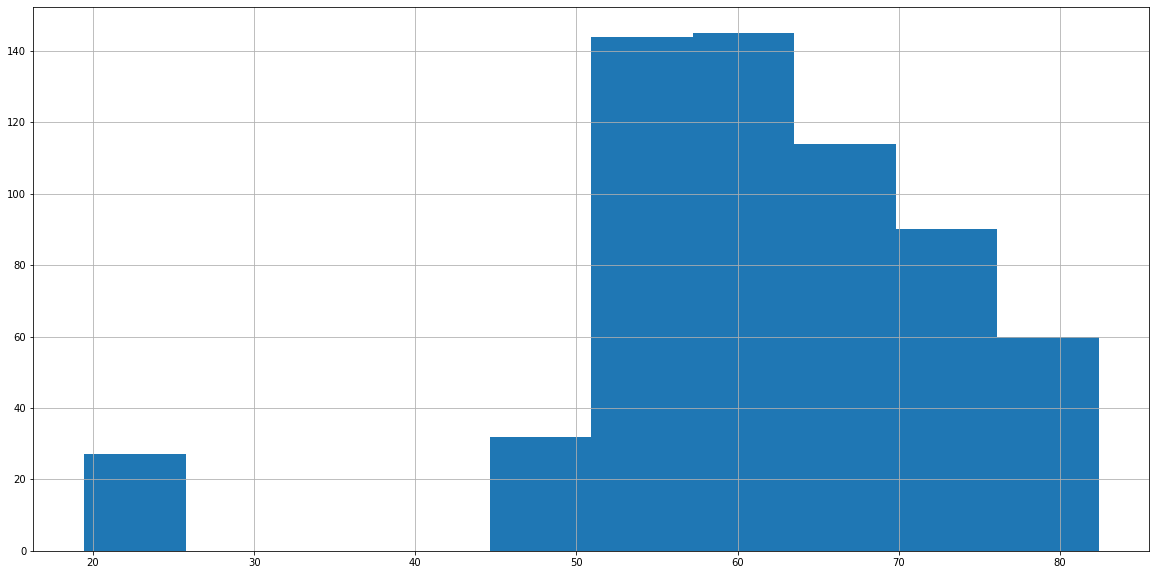

In [19]:
df.stringency_index.hist()

# The stringency index is however skewd to the right  with an outlier to the left

<AxesSubplot:>

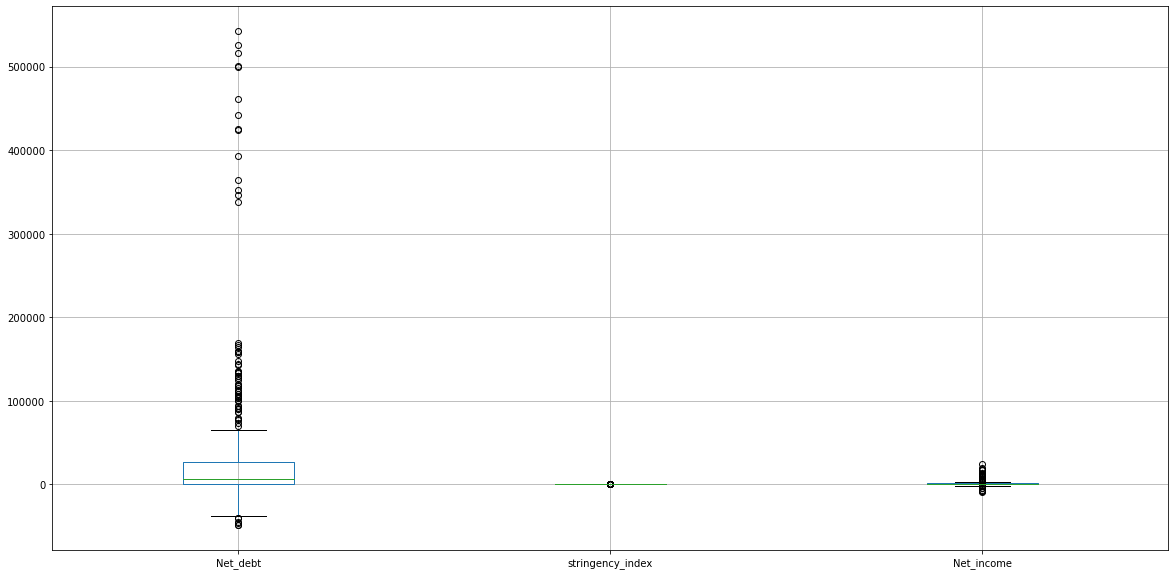

In [20]:
df.boxplot(column=["Net_debt","stringency_index",'Net_income'])

# the stringency index is more of less cohesive but we see that net income then net debt have a number of positive outliers.

In [21]:
df.columns

Index(['date', 'ISIN', 'Net_debt', 'Net_income', 'Name', 'Country', 'Sector',
       'Industry_Group', 'Industry', 'Sub_Industry', 'Debt_change',
       'Debt_change_num', 'total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'reproduction_rate', 'weekly_hosp_admissions',
       'new_tests', 'total_tests', 'positive_rate', 'tests_per_case',
       'tests_units', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'stringency_index'],
      dtype='object')


graph of date: total = 7



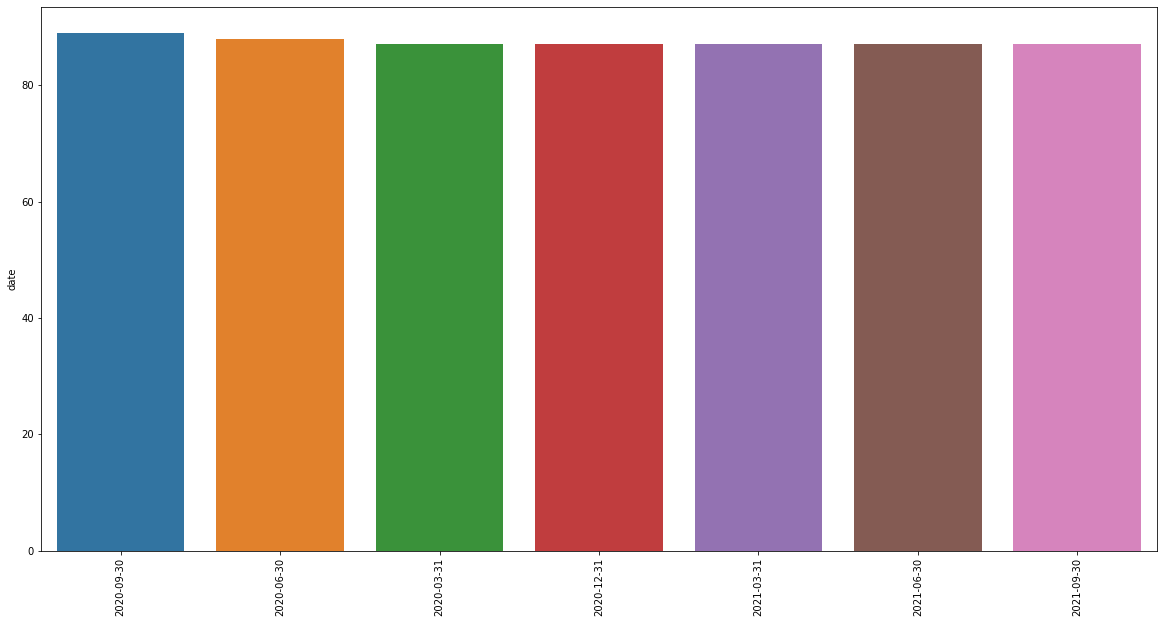


graph of ISIN: total = 89



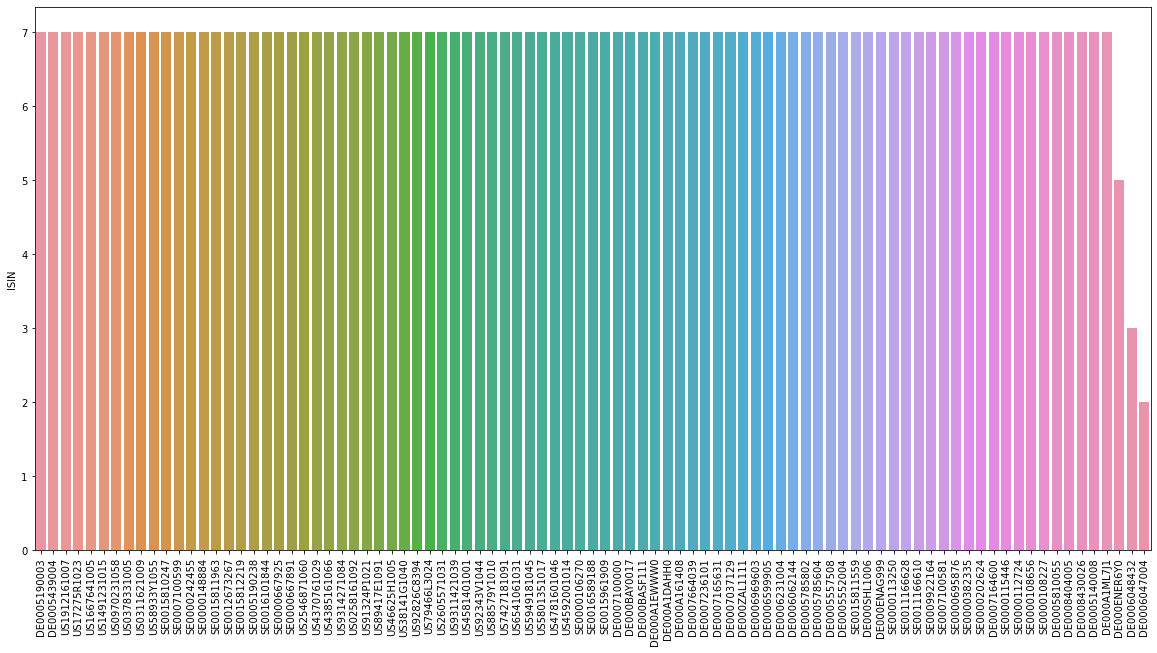


graph of Name: total = 87



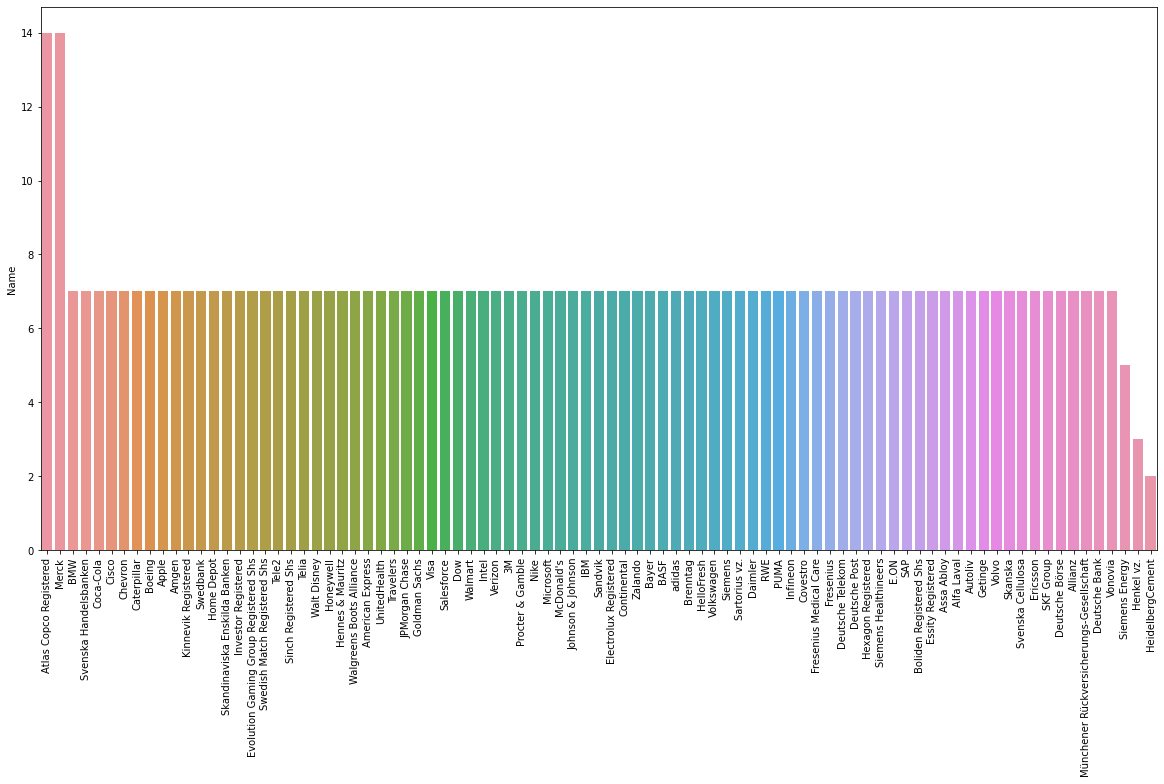


graph of Country: total = 3



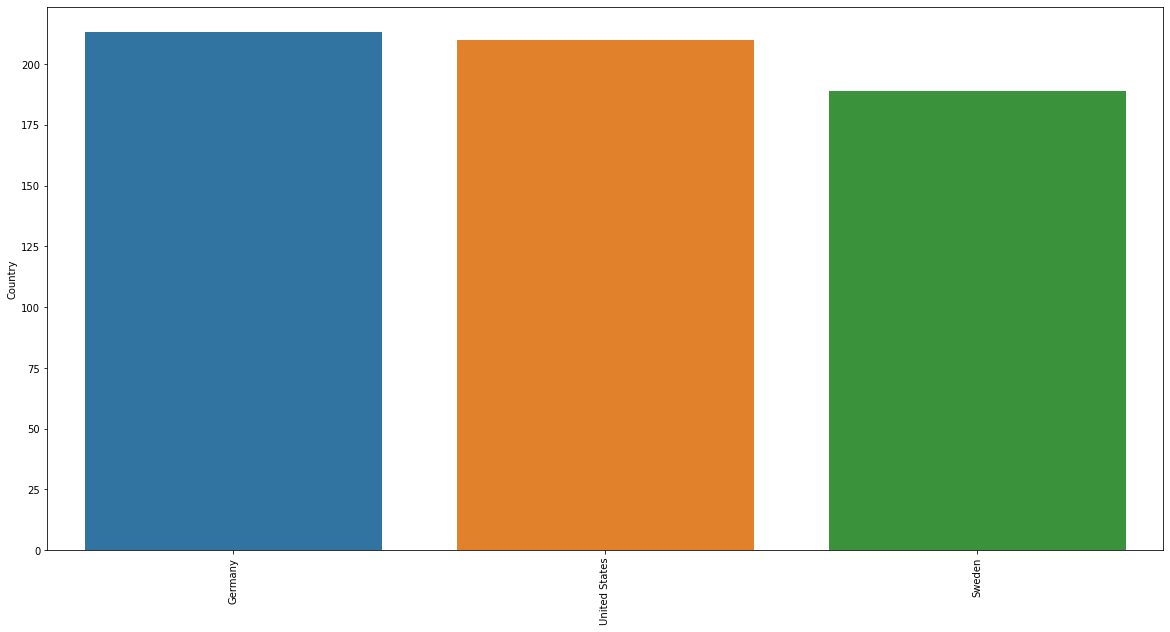


graph of Sector: total = 11



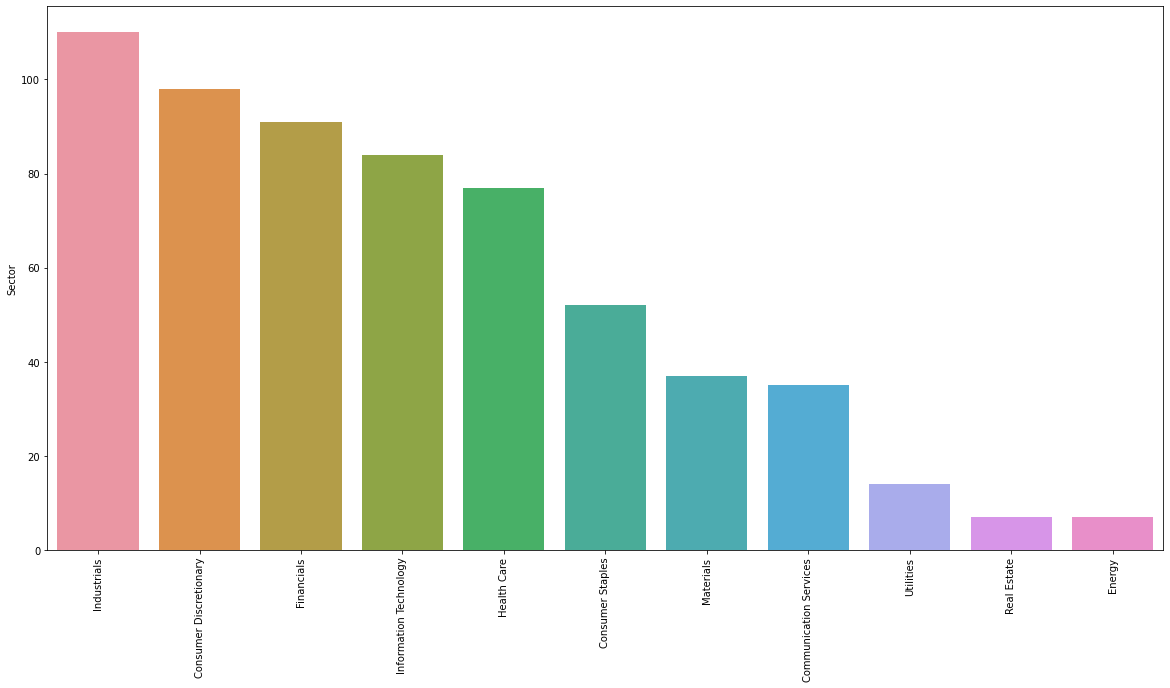


graph of Industry_Group: total = 23



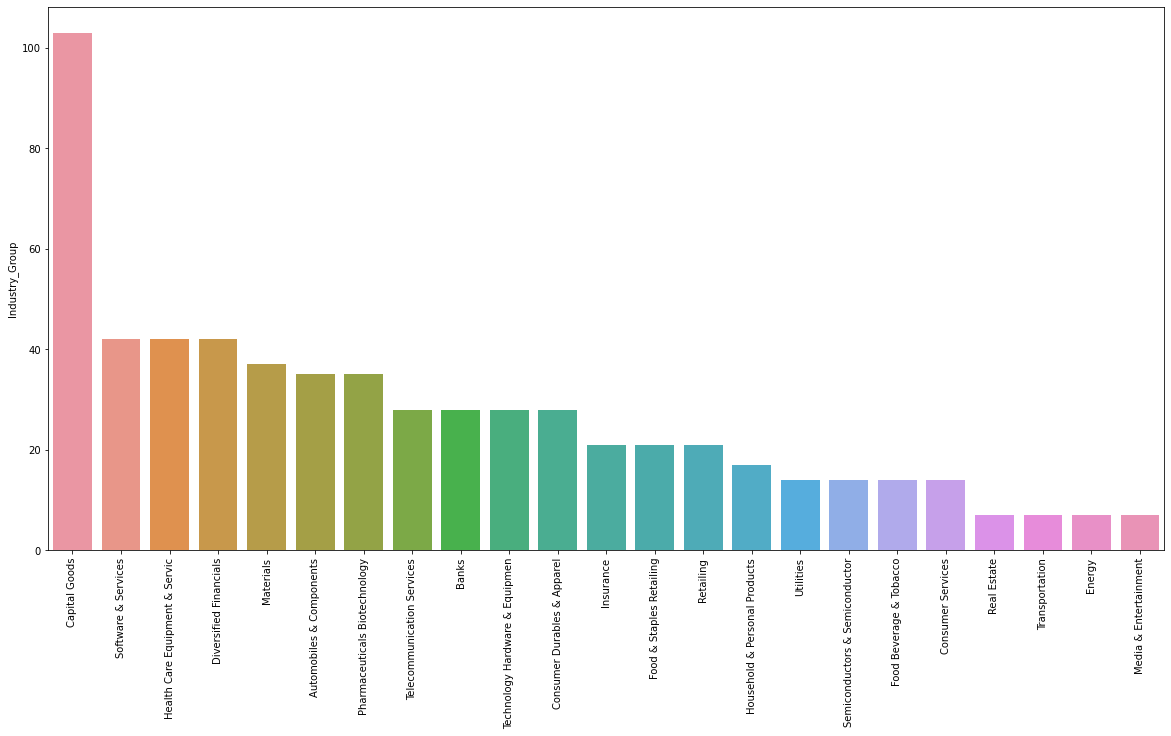


graph of Industry: total = 44



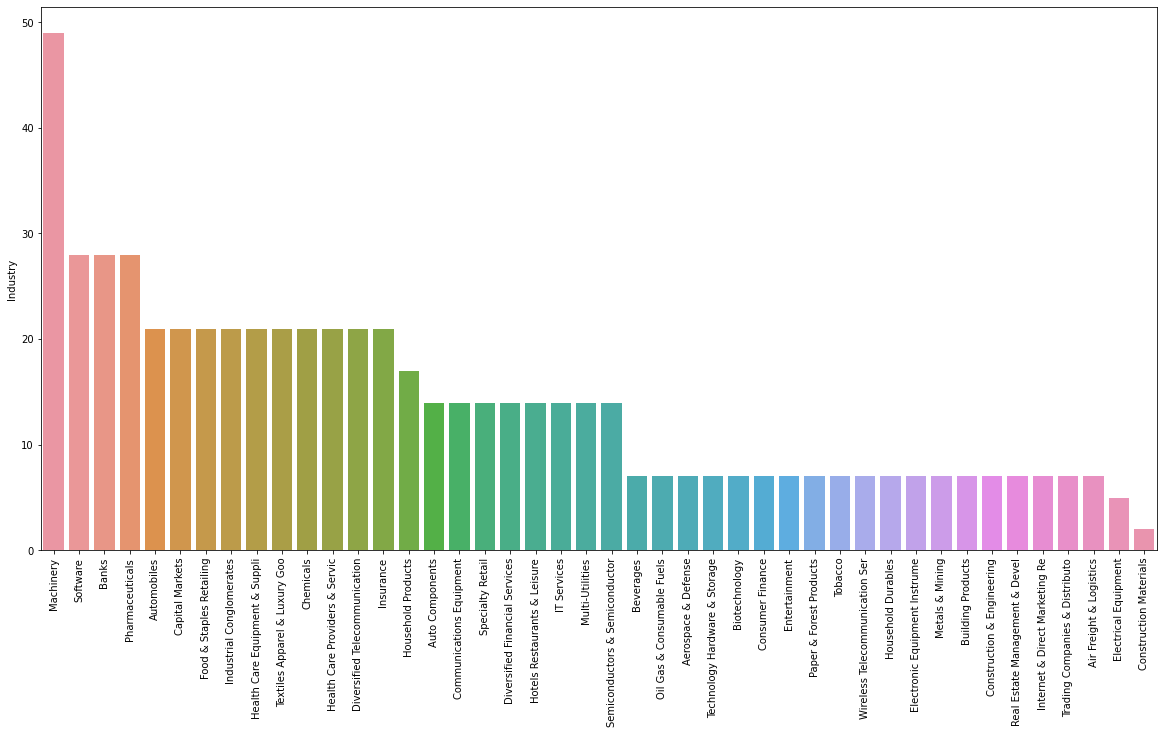


graph of Sub_Industry: total = 59



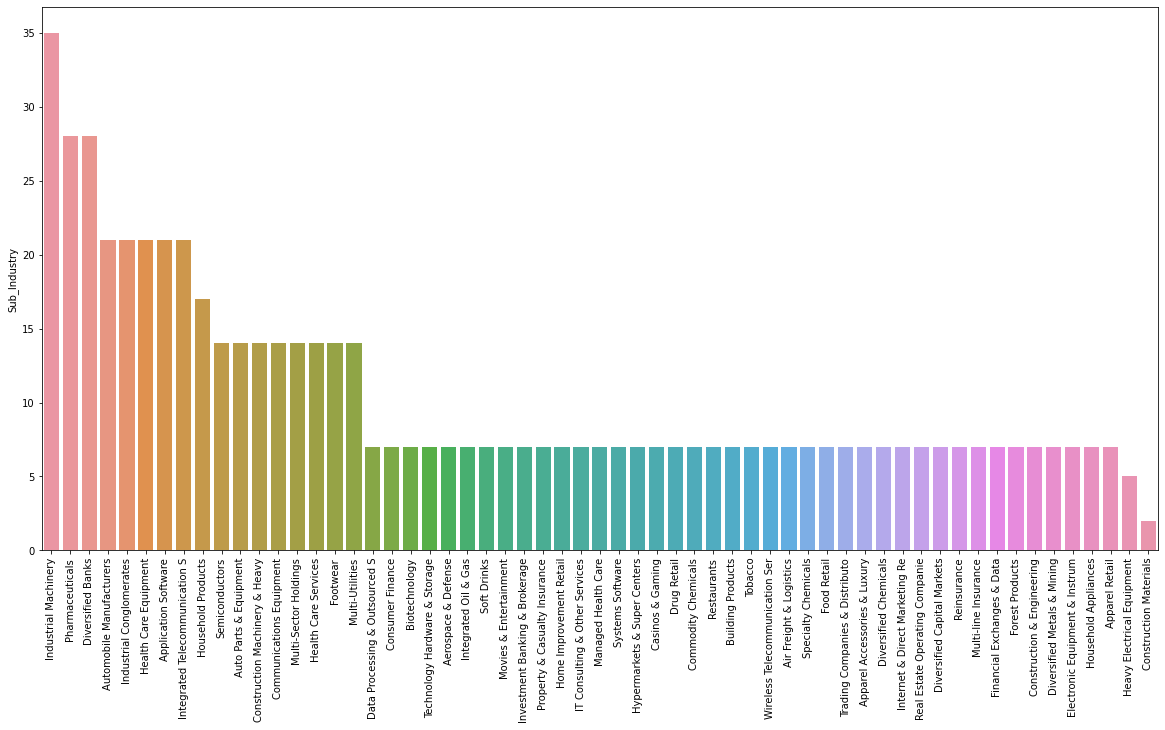


graph of Debt_change: total = 4



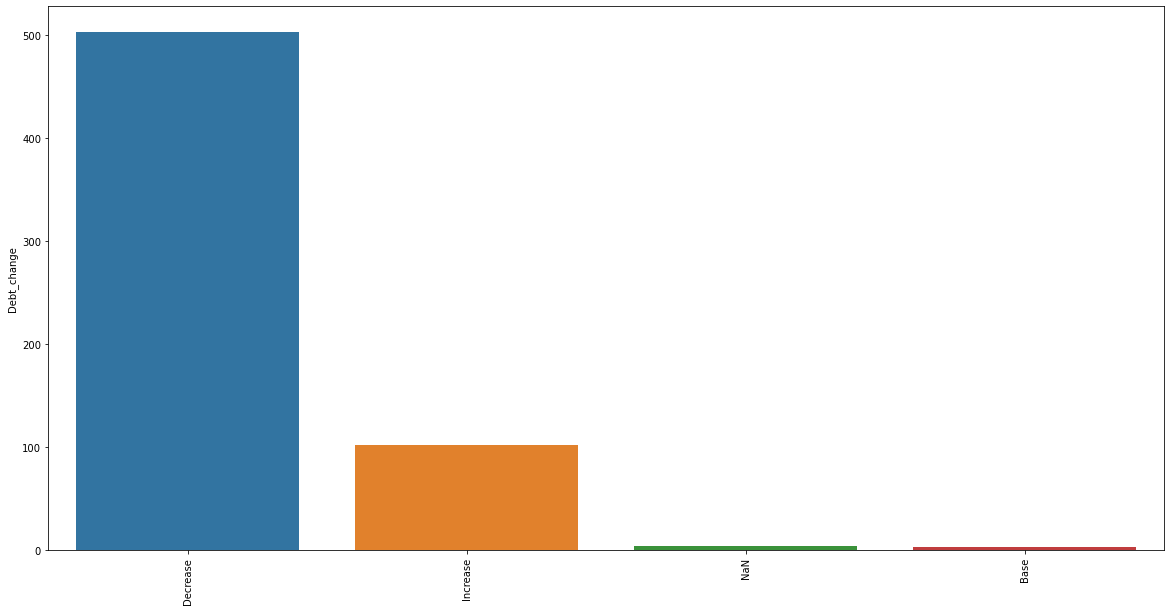

In [22]:
df_cat = df[['date', 'ISIN','Name', 'Country', 'Sector',
       'Industry_Group', 'Industry', 'Sub_Industry','Debt_change']]

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print(f"\ngraph of {i}: total = {len(cat_num)}\n")
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

# Questions
- How did the debt change for each industry?
- Which country,sector,industry,industry group, sub industry has the highest debt change and net debt?
- Which country,sector,industry,industry group, sub industry has the Lowest debt change and net debt?


In [23]:
df.columns

Index(['date', 'ISIN', 'Net_debt', 'Net_income', 'Name', 'Country', 'Sector',
       'Industry_Group', 'Industry', 'Sub_Industry', 'Debt_change',
       'Debt_change_num', 'total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'reproduction_rate', 'weekly_hosp_admissions',
       'new_tests', 'total_tests', 'positive_rate', 'tests_per_case',
       'tests_units', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'stringency_index'],
      dtype='object')


Graph of Sector against Net Debt



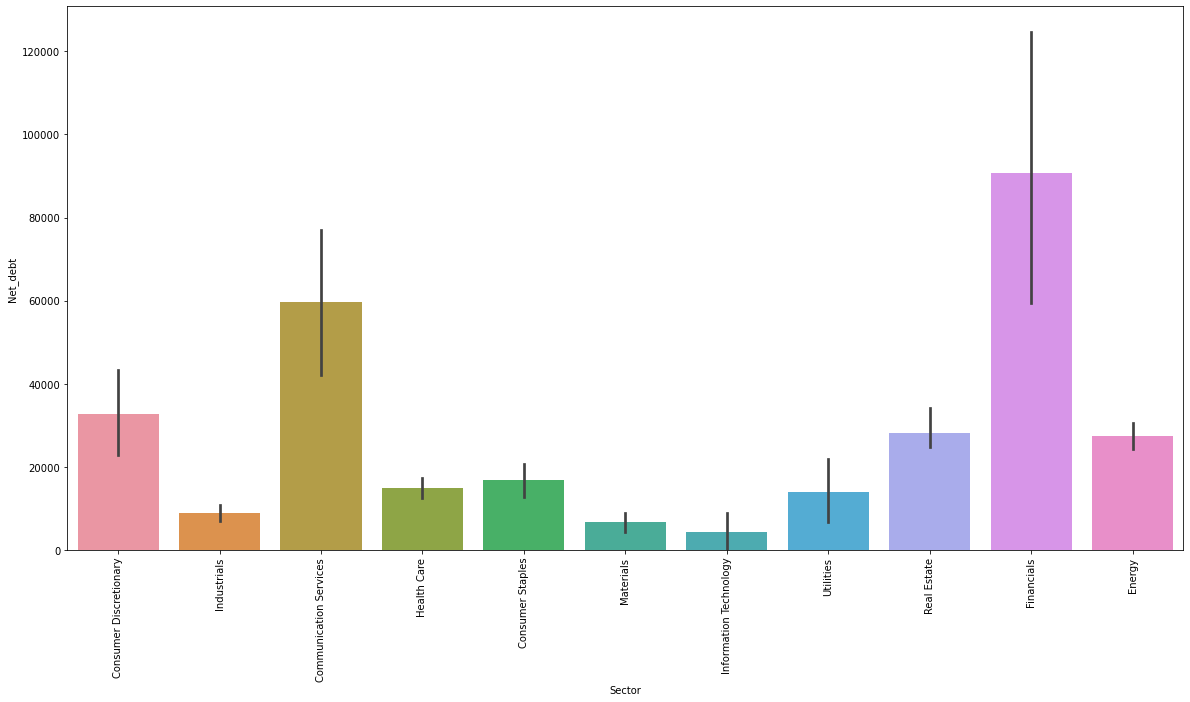


Graph of Industry against Net Debt



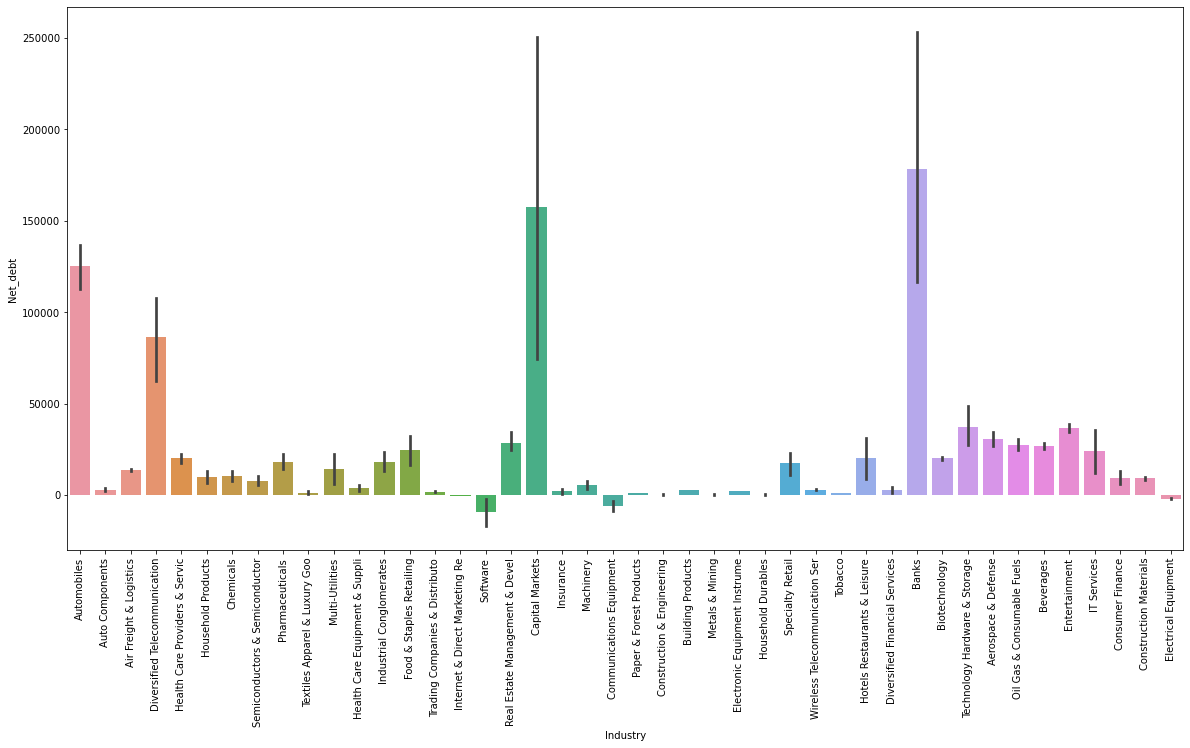


Graph of Industry_Group against Net Debt



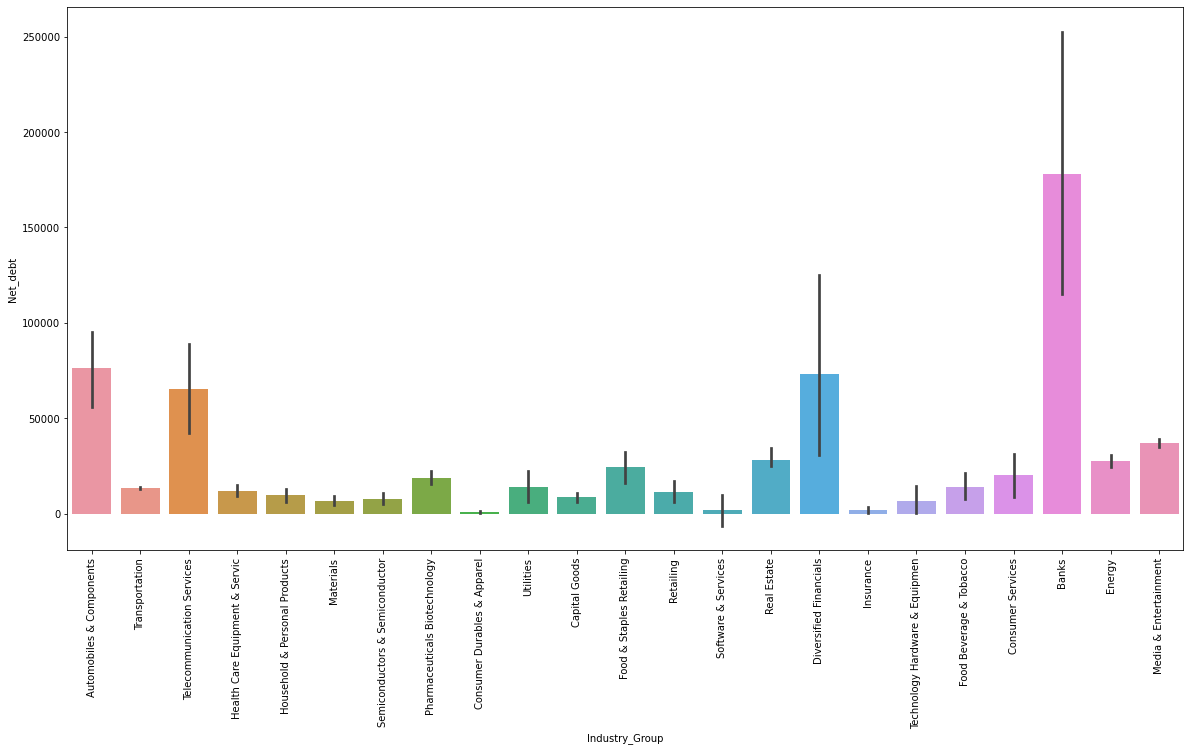


Graph of Sub_Industry against Net Debt



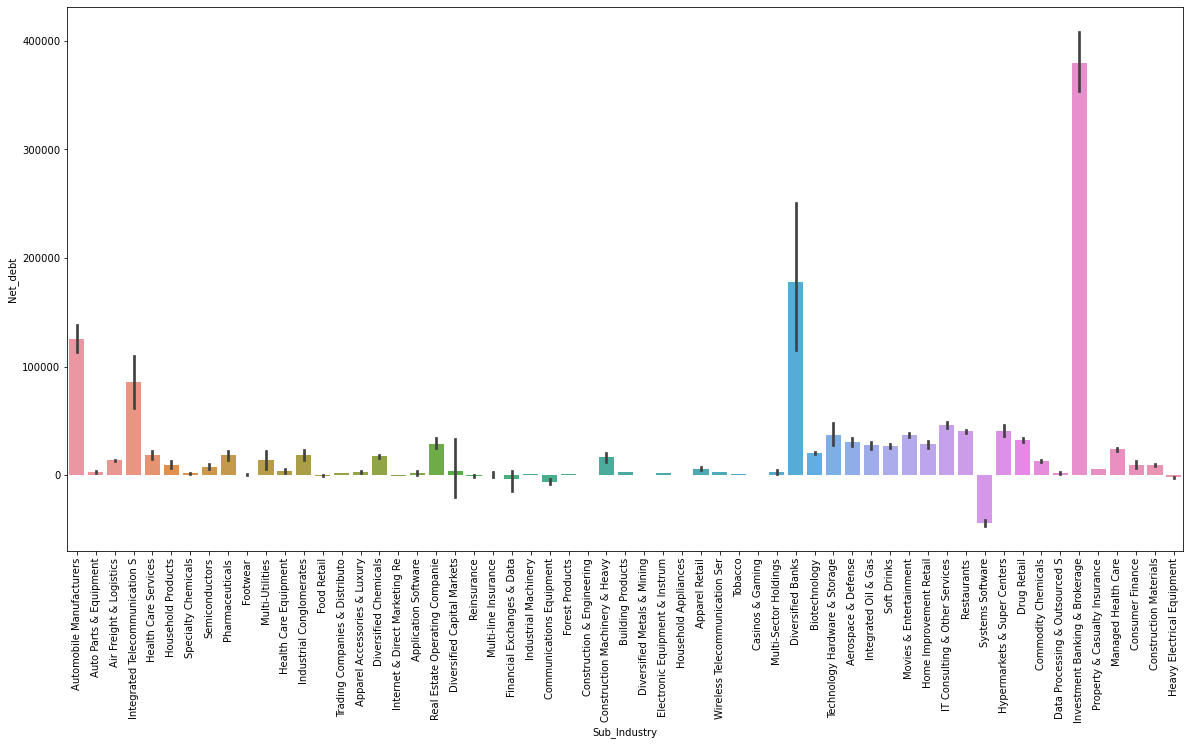


Graph of Country against Net Debt



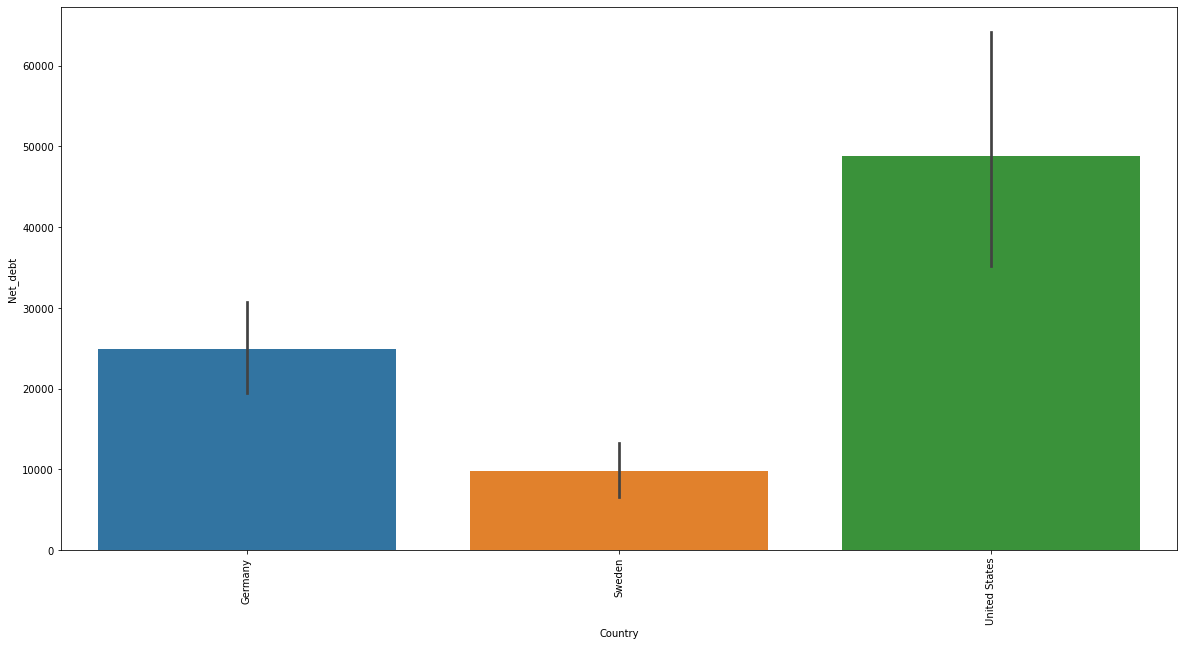

In [24]:
cat_debt = df[["Sector","Industry","Industry_Group", "Sub_Industry","Country"]]
for i in cat_debt:
    chart = sns.barplot(x=df[i],y=df["Net_debt"])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    print(f"\nGraph of {i} against Net Debt\n")
    plt.show()


Graph of Sector against Net Income



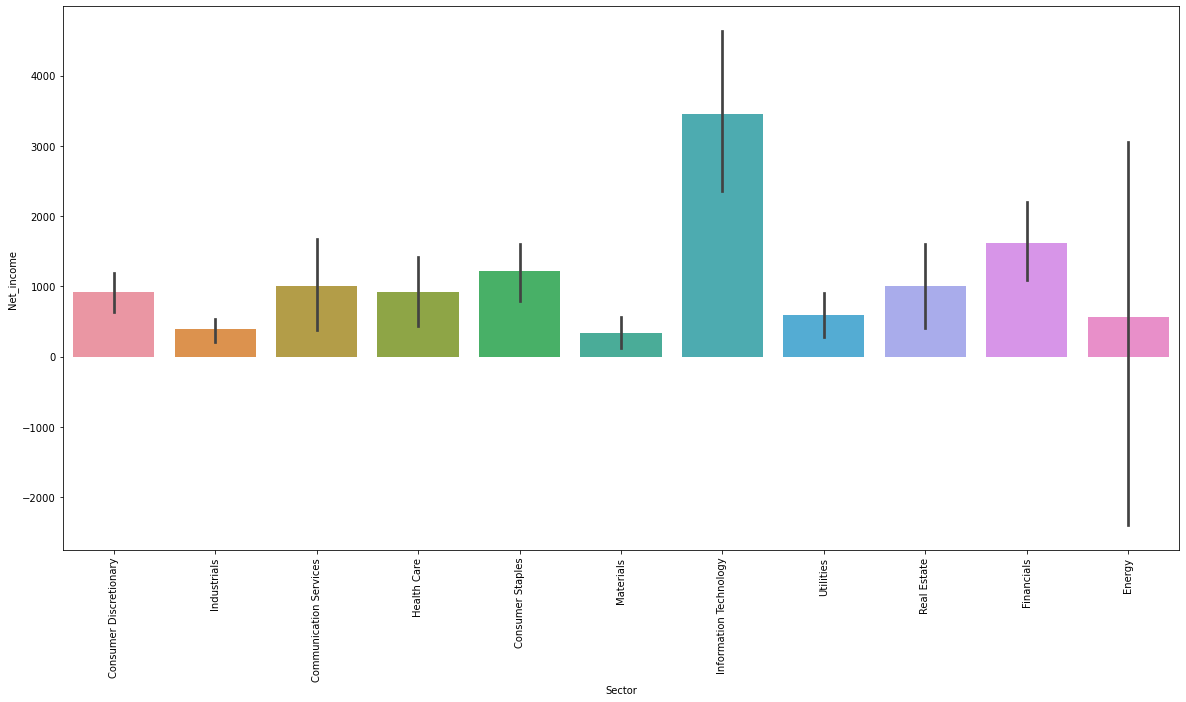


Graph of Industry against Net Income



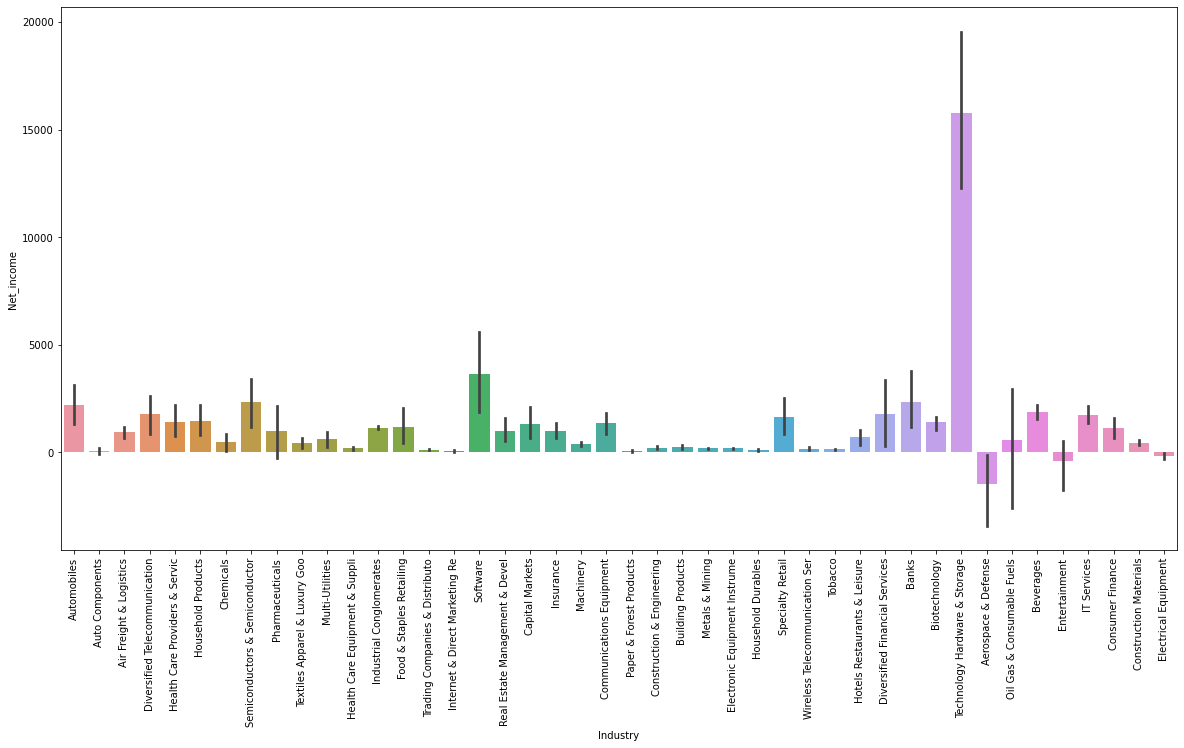


Graph of Industry_Group against Net Income



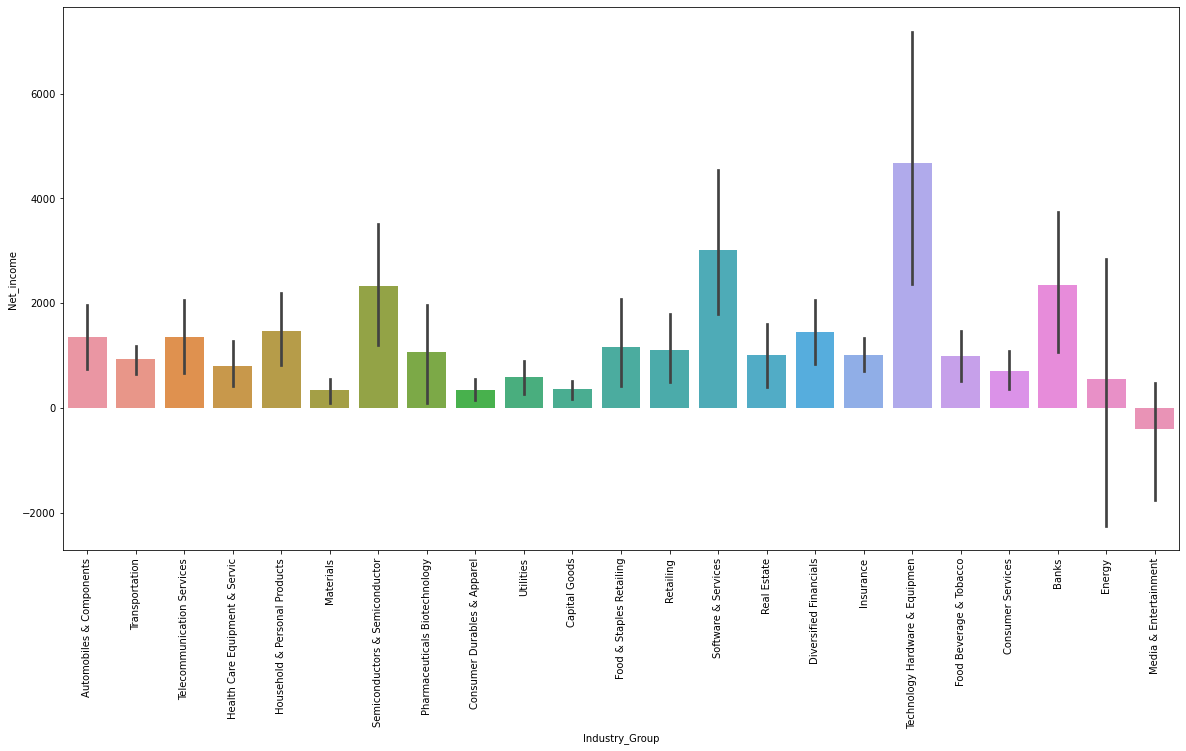


Graph of Sub_Industry against Net Income



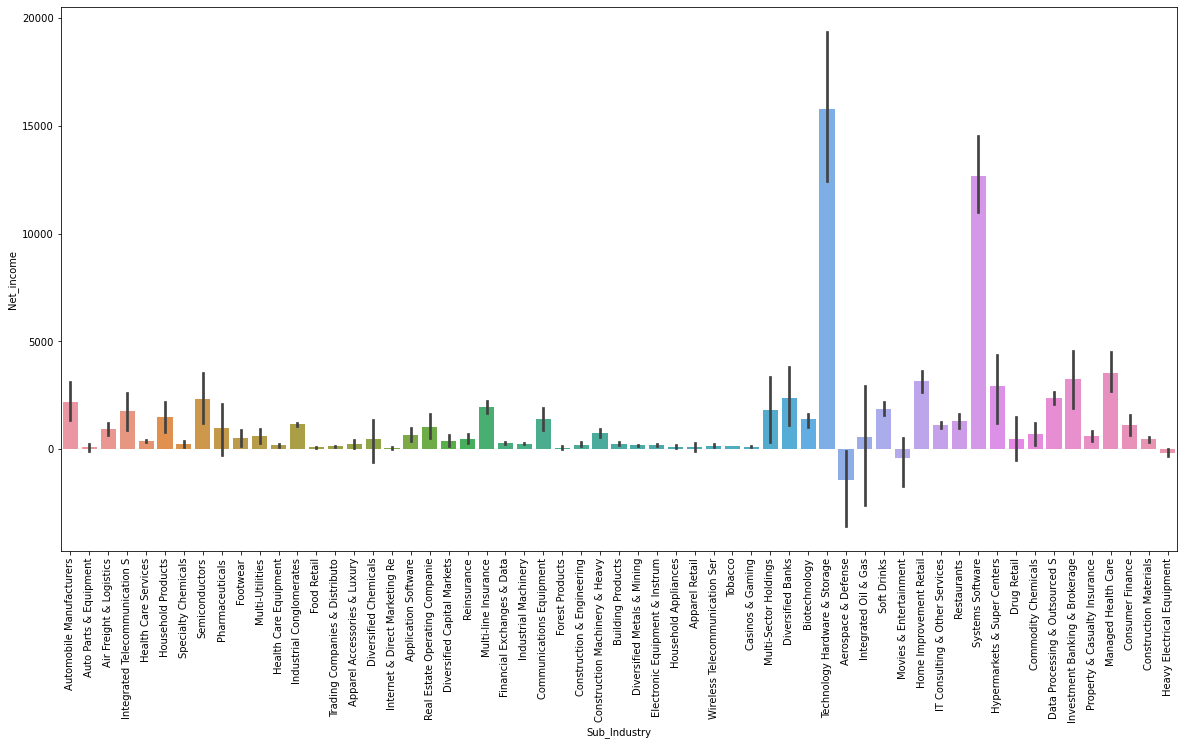


Graph of Country against Net Income



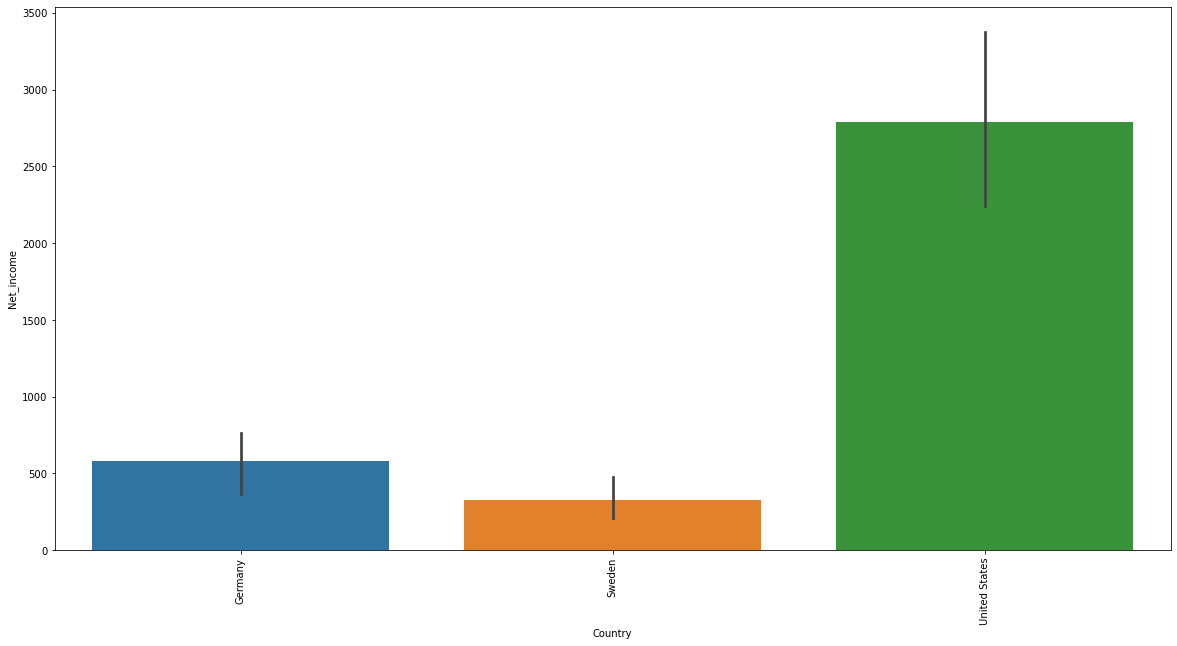

In [25]:
cat_debt = df[["Sector","Industry","Industry_Group", "Sub_Industry","Country"]]
for i in cat_debt:
    chart = sns.barplot(x=df[i],y=df["Net_income"])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    print(f"\nGraph of {i} against Net Income\n")
    plt.show()


Graph of Sector against Debt Change



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


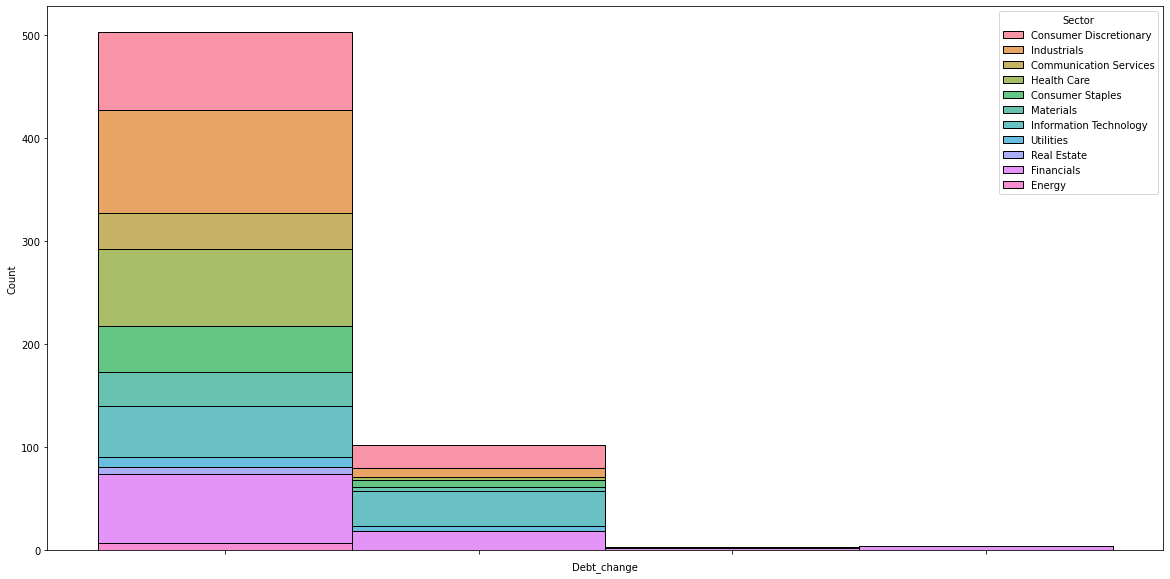

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """



Graph of Industry against Debt Change



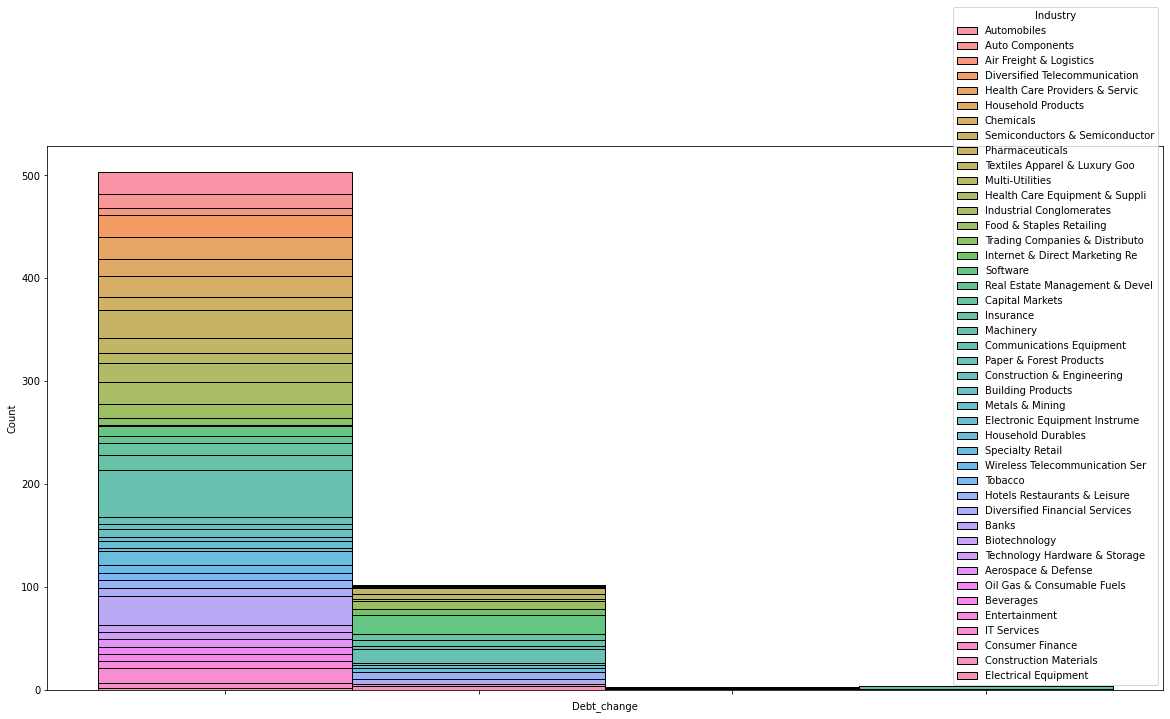

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """



Graph of Industry_Group against Debt Change



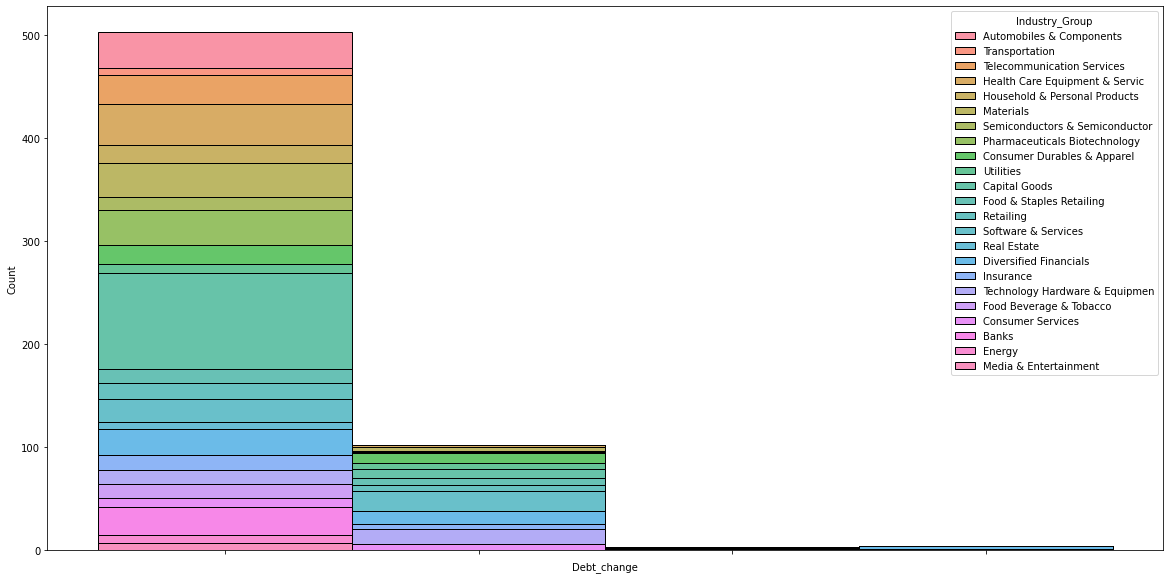

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """



Graph of Sub_Industry against Debt Change



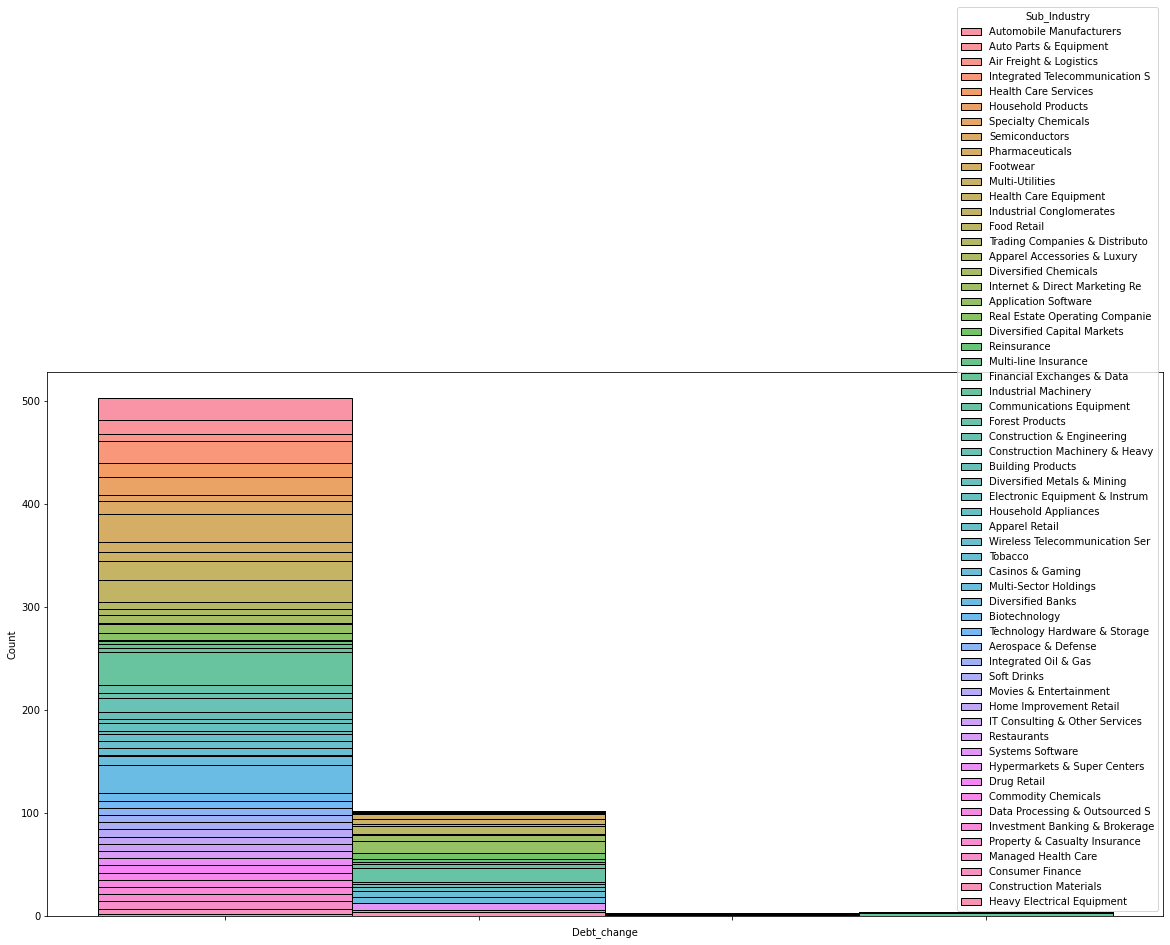


Graph of Country against Debt Change



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


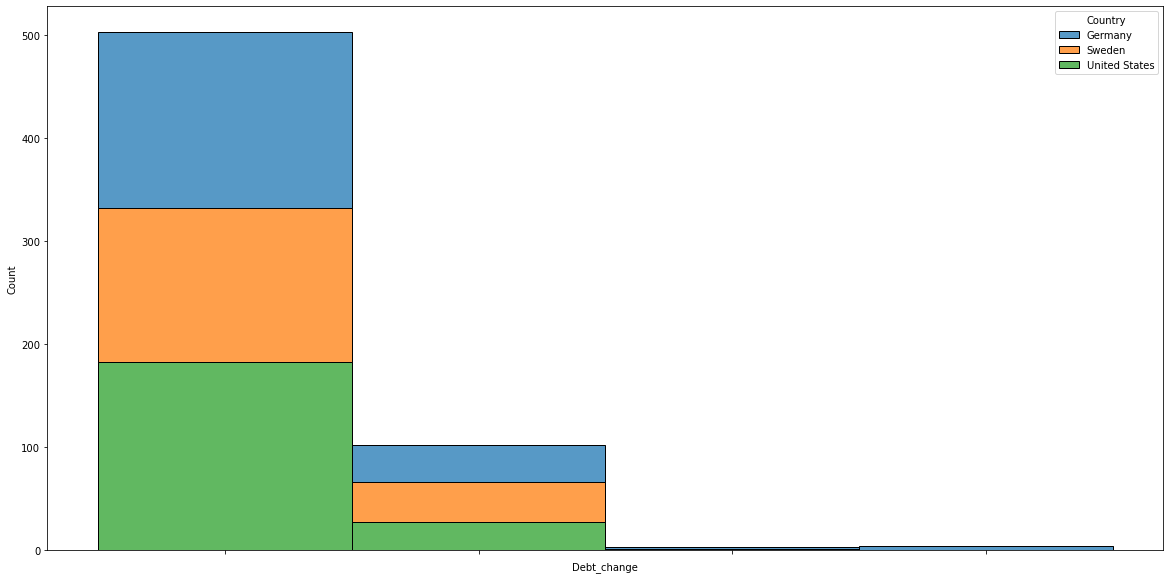

In [26]:
cat_debt = df[["Sector","Industry","Industry_Group", "Sub_Industry","Country"]]
for i in cat_debt:
    # chart = sns.barplot(x=df[i],y=df["Debt_change"].value_counts())
    chart = sns.histplot(binwidth=0.5, x="Debt_change", hue=i, data=df, stat="count", multiple="stack")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    print(f"\nGraph of {i} against Debt Change\n")
    plt.show()

In [27]:
df.columns

Index(['date', 'ISIN', 'Net_debt', 'Net_income', 'Name', 'Country', 'Sector',
       'Industry_Group', 'Industry', 'Sub_Industry', 'Debt_change',
       'Debt_change_num', 'total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'reproduction_rate', 'weekly_hosp_admissions',
       'new_tests', 'total_tests', 'positive_rate', 'tests_per_case',
       'tests_units', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'stringency_index'],
      dtype='object')